In [1]:
#Lets play with real data:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=150)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'George W Bush']
(766, 62, 47)


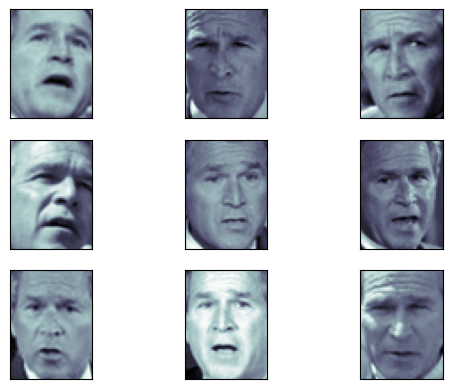

In [3]:
#Lets plot few of them:
fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])

In [4]:
import numpy as np
newarr = faces.images.reshape(766, 62*47)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(0.999999)
data = pca.fit_transform(newarr)
data.shape

(766, 765)

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=500, max_iter=10000,)
gmm.fit(data)
labels = gmm.predict(data)
labels.shape

(766,)

In [14]:
#Generating 16 new points:
data_new = gmm.sample(16)
dataf=data_new[0]

In [15]:
dataf = pca.inverse_transform(dataf)


In [16]:
dataf[1].shape

(2914,)

In [17]:
im = dataf.reshape(16, 62, 47)

In [18]:
im.shape

(16, 62, 47)

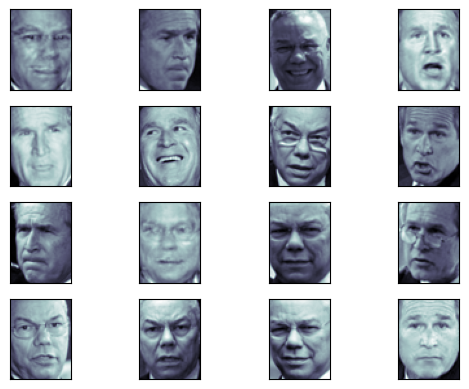

In [19]:
#Lets plot few of them:
fig, ax = plt.subplots(4, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(im[i], cmap='bone')
    axi.set(xticks=[], yticks=[])